### Numpy Basics

In [1]:
import numpy as np

#### Ndarray object

In [2]:
a = [1,2,3]
x = np.array(a)
x,type(x),x.dtype

(array([1, 2, 3]), numpy.ndarray, dtype('int64'))

#### Casting

In [3]:
x = x.astype(np.float)
x, 2*x, x.dtype

(array([1., 2., 3.]), array([2., 4., 6.]), dtype('float64'))

#### Elementwise operations

In [4]:
y = np.copy(x)
x + y, x * y,  x ** y, #etc e.g. x - y, x / y, x ** 0.5

(array([2., 4., 6.]), array([1., 4., 9.]), array([ 1.,  4., 27.]))

### Broadcasting

<img src='broad.jpg' width=500>

In [5]:
a = np.arange(0,4,1) # start, end-1, step (start = 0, step=1) <- default values
print(a)
a *= 10
print(a)
#create a column vector
a = a[:,None]
print(a, a.shape)
# create a row vector
b = np.arange(3)[None]
print(b, b.shape)

[0 1 2 3]
[ 0 10 20 30]
[[ 0]
 [10]
 [20]
 [30]] (4, 1)
[[0 1 2]] (1, 3)


In [6]:
# Broadcasting live
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

### Why Numpy ?

* More readable code
* A lot of implemented functions for scientific computing
* Much faster then pure Python

In [7]:
n = 100
A = np.random.normal(0,1,(n,n))
B = A.copy()
# Dot product implemented in pure Python
def dot_py(A,B):
    N,D = A.shape
    D,M = B.shape
    out = np.zeros((N,D))
    for n in range(N):
        for m in range(M):
            for d in range(D):
                out[n,m] += A[n,d]*B[d,m]
    return out

In [8]:
# Check if the output is the same
same = np.allclose( dot_py(A,B) , np.dot(A,B) ) 
assert same

### Measure the execution time in Python

In [9]:
from time import time
st = time()
dot_py(A,B)
end = time()
end-st

0.5746681690216064

In [10]:
# Measure the execution time in Numpy
st = time()
np.dot(A,B)
end = time()
end-st

0.0002715587615966797

##  Plotting

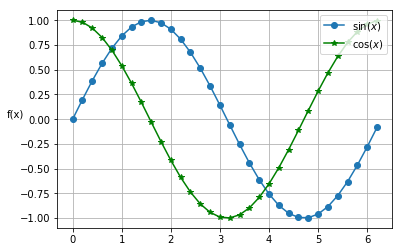

In [11]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

plt.figure(figsize=(6,4))
X = np.arange(0,2*np.pi,0.2)
plt.plot(X,np.sin(X),'o-',label='$\sin(x)$')
plt.plot(X,np.cos(X),'*-',c='green', label='$\cos(x)$')
plt.ylabel(f'f(x)', rotation=0)
plt.grid() # adds grid 
_=plt.legend(loc=1)

## Sampling

### Univariate normal (Gaussian) distribution   

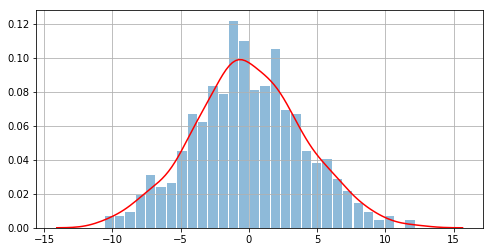

In [12]:
import seaborn as sns
import numpy.random as rnd

X = rnd.normal(loc=0, scale=4, size=550)

#or using scipy package
from scipy.stats import norm 

X = norm.rvs(loc=0,scale=4,size=550)

plt.figure(figsize=(8,4))
# Histogram plot 
plt.hist(X,bins=30, rwidth=0.9, alpha=0.5, density=True)
plt.grid()
_=sns.kdeplot(X, color='r')

### Numpy Usage Example: Univariate normal (Gaussian) PDF

<center>
$\boxed{\small{\mathcal{N}(x | \mu, \sigma)} = 
\frac{1}{\sqrt{2\pi\sigma^2}}\exp{\Big(-\frac{(x - \mu)^2}{2\sigma^2}\Big)}}$

In [13]:
def normal_pdf(X, mean=0, sigma=1):
    return 1./np.sqrt(2*np.pi*sigma**2)*np.exp(-(X - mean)**2/(2*sigma**2))

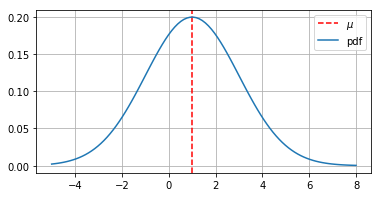

In [14]:
X = np.linspace(-5,8,100)
plt.figure(figsize=(6,3))
plt.grid()
plt.axvline(1,c='r',ls='--', label='$\\mu$')
_=plt.plot(X,normal_pdf(X,1,2),label='pdf')
_=plt.legend()

In [15]:
m = 1
sigma = 4
print(normal_pdf(X,m,sigma)[:3], norm.pdf(X,m,sigma)[:3]) # print the values just for first three elements

[0.0323794  0.03399543 0.03565366] [0.0323794  0.03399543 0.03565366]


In [16]:
assert np.allclose(normal_pdf(X,m,sigma), norm.pdf(X,m,sigma)) # make sure all of the results are the same

### Analyse for different parameter values ( i.e. means and variances )

In [17]:
# Define some means and standart deviations
mu = [-5,0,5]
K = len(mu)
sigma2 = np.power(K*[2], np.arange(1,K+1))
print(mu,sigma2)

[-5, 0, 5] [2 4 8]


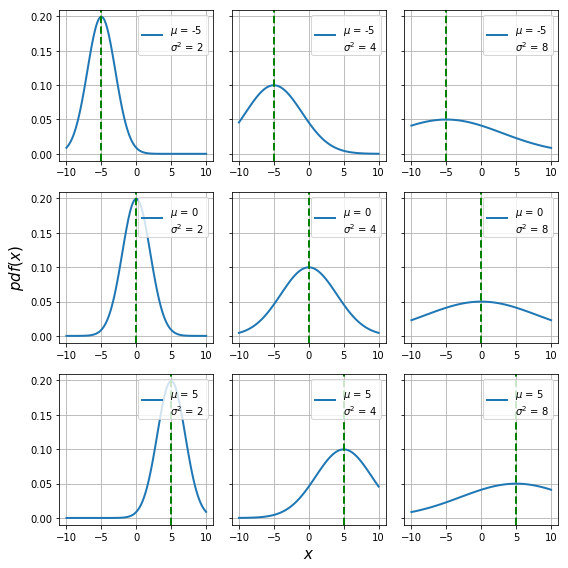

In [18]:
import matplotlib as mpl
# set some global plot settings
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['figure.figsize'] = (10,8)

# define the grid of the canvas (plot) 
fig,axs = plt.subplots(K,K,sharey=True,figsize=(8,8))

X = np.linspace(-10,10,100) # define some testing values to calculate Gaussian PDF
K = len(mu)
for i in range(K):
    for j in range(K):
        ax = axs[i,j] 
        m = mu[i]
        s2 = sigma2[j]
        pdf = normal_pdf(X,mean=m,sigma=s2)
        ax.plot(X,pdf, label=f'$\mu$ = {m} \n$\sigma^2$ = {s2}')
        ax.axvline(m,ls='--',c='g')
        ax.grid()
        ax.legend(loc=1)
axs[2,1].set_xlabel('$x$',fontsize=15)
axs[1,0].set_ylabel('$pdf(x)$', fontsize=15)
fig.tight_layout()

## Coin flipping example 

#### Model distribution (likelihood)
<br>
<center>
$
\large{p( h,N | \theta) = \text{Binomial}(h,N |\theta) = \binom{N}{h} \theta^{h} (1 - \theta)^{N-h}}
$
</center>
<hr>

In [19]:
theta_real = 0.35 # true theta value for the Binomial distribution\

In [20]:
# Observed data

trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150, 210, 270, 330] # number of trials
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48, 78, 96, 118]  # number of the observed heads

#### Prior distribution
<center>
$
\large{p(\theta | \alpha, \beta) = \text{Beta}(\alpha,\beta)= \frac{1}{B(\alpha,\beta)}}\theta^{\alpha-1}(1 - \theta)^{\beta-1}, \quad B(\alpha,\beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)}
$
<br>

### Beta distribution

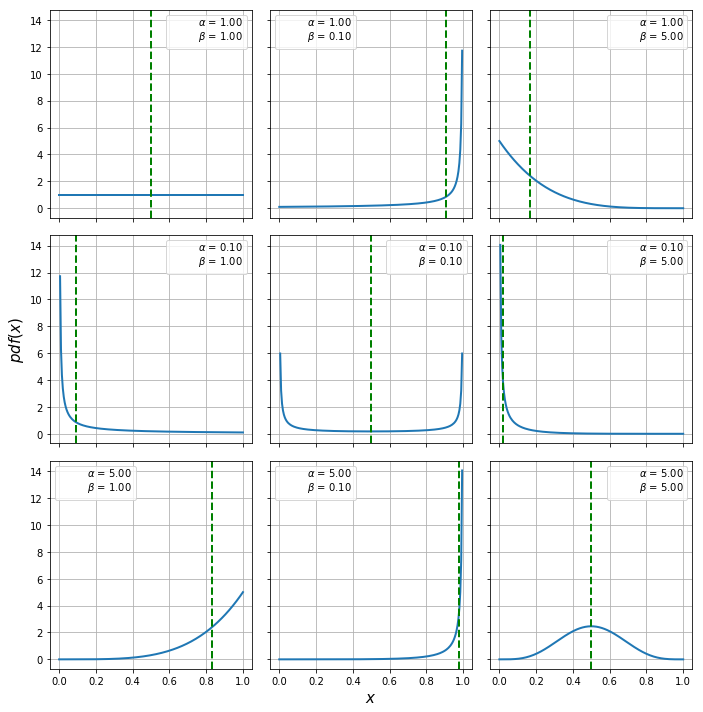

In [21]:
from scipy.stats import beta

alphas = [1, .1, 5]
betas = [1, .1, 5]

x = np.linspace(0, 1, 200)
K = len(alphas)
fig, axs = plt.subplots(K, K, sharex=True, sharey=True, figsize = (10,10))
for i in range(K):
    for j in range(K):
        alpha = alphas[i]
        bet = betas[j]
        rv = beta(alpha, bet)
        ax = axs[i,j]
        ax.plot(x, rv.pdf(x))
        ax.plot(0, 0, label="$\\alpha$ = {:3.2f}\n$\\beta$ = {:3.2f}".format(alpha, bet), alpha=0)
        ax.axvline(alpha/(alpha + bet),ls='--',c='g')
        ax.legend()
        ax.grid()
axs[2,1].set_xlabel('$x$',fontsize=15)
axs[1,0].set_ylabel('$pdf(x)$', fontsize=15)
fig.tight_layout()

#### Posterior distribution
<center>
    $\large{\overbrace{p(\theta | h, \alpha, \beta)}^{\text{posterior}} \propto  \overbrace{\theta^{h} (1 - \theta)^{N-h}}^{\text{likelihood}} \overbrace{\theta^{\alpha-1}(1 - \theta)^{\beta-1}}^{\text{prior}}
    }$
<br><br>

<center>
$
\large{p(\theta | h, \alpha, \beta) \propto \theta^{ h + \alpha -1 }(1 - \theta)^{N - h + \beta-1} }
$
</center>
    <hr>
<center>
$
\large{p(\theta | h, \alpha, \beta) = \text{Beta}(\hat{\alpha},\hat{\beta}), \text{where} \quad \hat{\alpha} = h+\alpha, \quad \hat{\beta} = N - h + \beta }
$

In [22]:
beta_params = [(1, 1), (0.1, 0.1), (5, 5)] # Beta distiribution parameters used as priors
x = np.linspace(0, 1, 100)

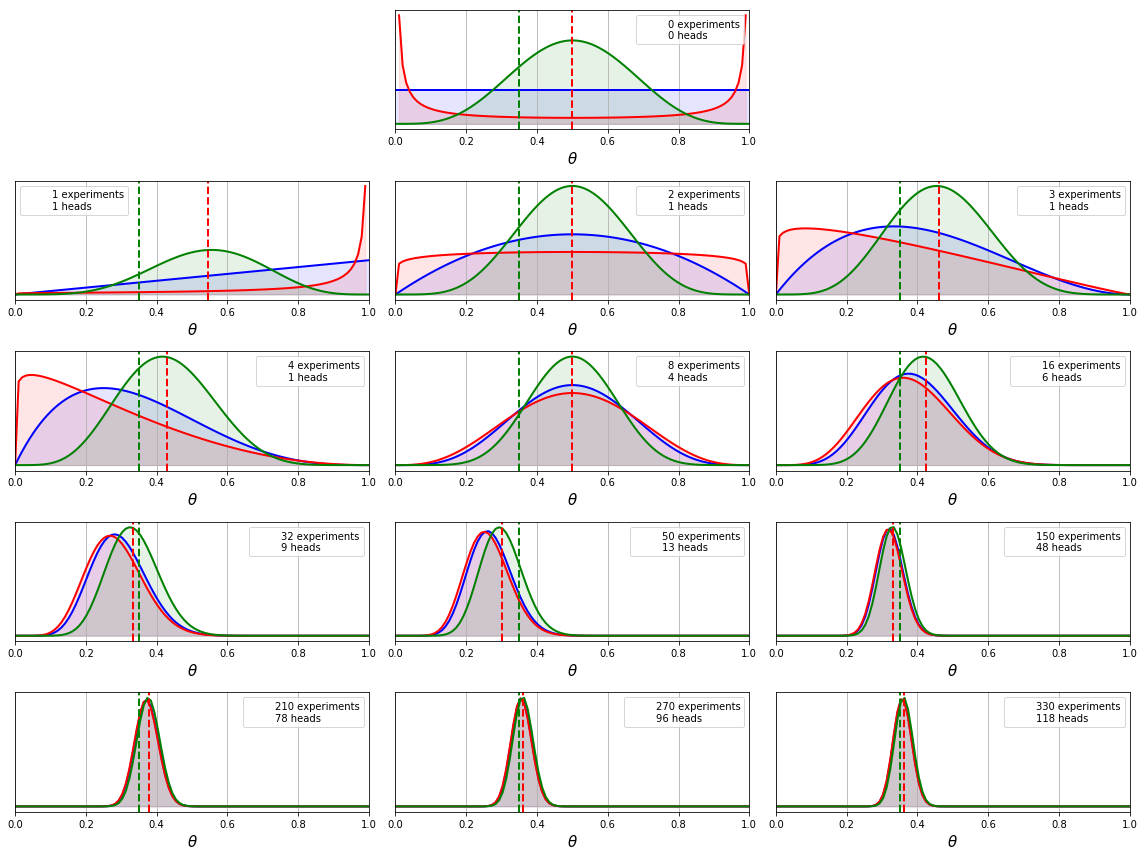

In [23]:
fig = plt.figure(figsize=(16,12))
for idx, N in enumerate(trials):
    if idx == 0:
        plt.subplot(5, 3, 2)
    else:
        plt.subplot(5, 3, idx+3)
    heads = data[idx]
    for (alpha_prior, beta_prior), c in zip(beta_params, ('b', 'r', 'g')):
        alpha_hat = heads + alpha_prior
        beta_hat = N - heads + beta_prior
        p_post = beta.pdf(x, alpha_hat, beta_hat)
        plt.plot(x, p_post, c)
        plt.grid(axis='x')
        plt.fill_between(x, 0, p_post, color=c, alpha=0.1)
    plt.axvline(alpha_hat/(alpha_hat + beta_hat),ymax=1, c='r',linestyle='--')
    plt.axvline(theta_real, ymax=1, color='g',linestyle='--')
    plt.plot(0, 0, label="{:d} experiments\n{:d} heads".format(N,heads), alpha=0)
    plt.xlim(0,1)
    plt.xlabel(r'$\theta$', fontsize=15)
    plt.legend()
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.tight_layout()

# Mulivariate Distributions

## Numpy Usage Example: Gaussian (multivariate) PDF 
<br><br>
<center>
$
\boxed{
    {\mathcal{N}(x | \mu, \Sigma)} = 
    \frac{1}{\sqrt{(2\pi)^d |\Sigma|}}
    \exp\Big(-\frac{1}{2} (x - \mu)^{\top}\Sigma^{-1}(x-\mu)\Big)
    , \quad \mu \in \mathbb{R}^{(d)}, \quad \Sigma \in \mathbb{R}^{(d,d)}
}
$

In [24]:
import numpy.linalg as la
def multivariate_normal_pdf(X, mean=np.zeros(2), cov = 1*np.eye(2)):
    N,d = X.shape
    Xm  = X - mean[None] # (N,d) - (1,d)
    C = 1./np.sqrt(2*np.pi**d*np.linalg.det(cov))
    lst = [C*np.exp(-0.5*(Xm[i]).T @ la.inv(cov) @ (Xm[i])) for i in range(N)]
    return np.array(lst)

### Multivariate normal (Gaussian) distribution (d=2)   

In [25]:
mu = np.zeros(2)
cov = np.eye(2)
X = rnd.multivariate_normal(mu,cov,size=100)
print('Shape:',X.shape)
print(X[:5])

Shape: (100, 2)
[[-0.51118526 -0.09599506]
 [ 0.09624214 -1.07119994]
 [ 0.25490914 -1.44238652]
 [-0.47754176  0.07356159]
 [-0.8762452  -0.73064075]]


In [26]:
from matplotlib import cm
def draw_plot_gaussian(mu,cov,n=500):
    X = rnd.multivariate_normal(mu,cov,size=n)
    cs = multivariate_normal_pdf(X,mu,cov)
    plt.figure()
    plt.scatter(*X.T,marker='*',c=cs, cmap=cm.rainbow,
                label=f'$\mu$ = {np.round(X.mean(0))}\n$\sigma^2$={np.round(X.std(0))}')
    plt.scatter(*X.mean(0),color='k',linewidth=5)
    plt.margins(0.2)
    plt.grid()
    _=plt.legend()

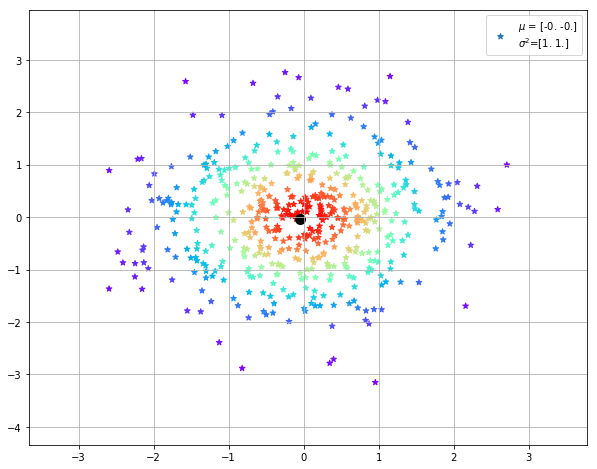

In [27]:
draw_plot_gaussian(mu,cov)

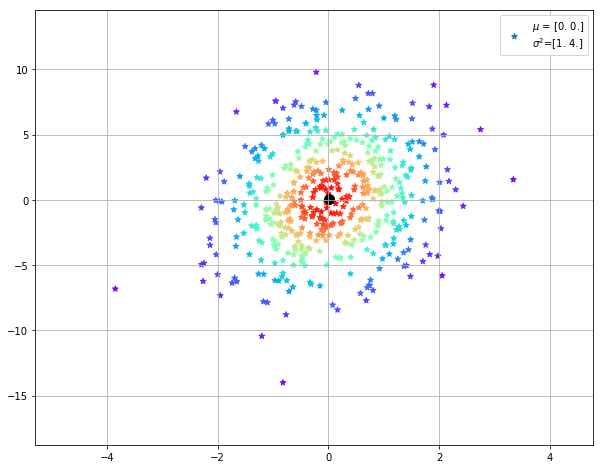

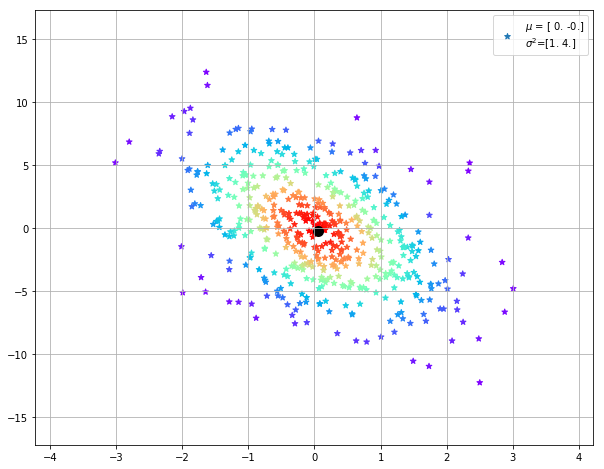

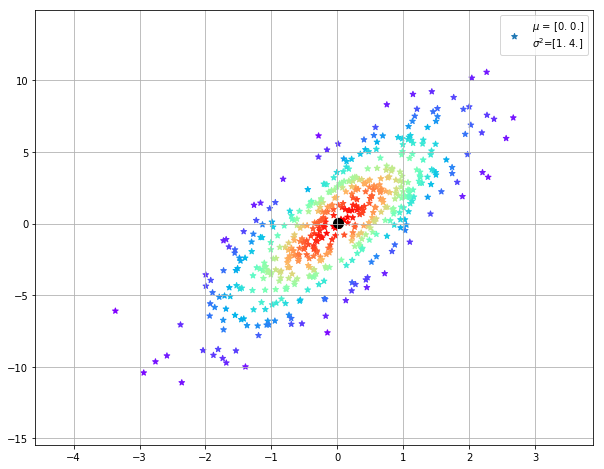

In [28]:
s1 = 1
s2 = 4
ps = [0.2,-0.5,0.8]
for p in ps:
    cov = np.array(
        [
            [s1*s1,p*s1*s2],
            [p*s2*s1,s2*s2]
        ])
    draw_plot_gaussian(mu,cov)

### Dirichlet distribution ( distribution of distributions ) Multivariate Beta

<center>
$
\boxed{
    {
        K \geq 2, \quad \alpha = (\alpha_1,...,\alpha_K), \quad \alpha_i > 0 \\
        x_i \in (0,1) \quad \text{and} \quad \sum_{i=1}^K x_i=1, \quad \hat{\alpha} = \sum_{i=1}^K \alpha_i \\
        \mathcal{Dir}(x|\alpha) = \mathcal{C}(\alpha)\prod_{i=1}^K x_i^{\alpha-1}, 
        \quad \mathcal{C}(\alpha) = \frac{\Gamma(\hat{\alpha})}{\prod_{i=1}^K \Gamma(\alpha_i)}, \quad
        \Gamma(z) =  \int_0^{\infty} x^{z-1}e^{-x}dx
    }
}
$

In [29]:
from scipy.special import gamma

def dirichlet_pdf(X, alpha):
    assert np.all(X > 0) & np.all(X < 1)
    assert np.all(alpha > 0)
    assert len(alpha.shape) == 1
    assert len(alpha) >= 2
    assert X.shape[0] == len(alpha)

    B = np.prod(gamma(alpha))/gamma(np.sum(alpha))

    # K,N ** K
    return np.prod(X ** (alpha[:,None]-1), 0) / B

In [30]:
K = 5
X = np.abs(rnd.normal(0,1,size=(K,100)))
X = X / X.sum(0)[None]
X[:,:5],np.sum(X[:,:5],0)

(array([[0.01664104, 0.02401149, 0.1232363 , 0.14798309, 0.1213348 ],
        [0.29923994, 0.12873152, 0.31309265, 0.0490445 , 0.0936485 ],
        [0.10635628, 0.46840448, 0.40201618, 0.47991534, 0.15627142],
        [0.15492362, 0.34153422, 0.0164444 , 0.08968215, 0.02113456],
        [0.42283912, 0.03731829, 0.14521046, 0.23337492, 0.60761072]]),
 array([1., 1., 1., 1., 1.]))

In [31]:
alpha = np.ones(K)
dirichlet_pdf(X[:,:2], alpha)

array([24., 24.])

In [32]:
# There is a PDF implementation in SciPy package 
from scipy.stats import dirichlet
alpha = np.ones(K)
dirichlet.pdf(X[:,:1],alpha)

24.000000000000004

In [33]:
# Sample from the Dirichlet distribution
dirichlet.rvs(alpha,size=3)

array([[0.6624455 , 0.00450507, 0.00971809, 0.13959316, 0.18373818],
       [0.0962695 , 0.40955176, 0.04125176, 0.35547869, 0.09744828],
       [0.50303602, 0.00696161, 0.18876932, 0.13691751, 0.16431554]])

In [34]:
assert np.allclose( dirichlet_pdf(X,alpha), dirichlet.pdf(X,alpha))

### Sample from Dirichlet distribution

In [35]:
alpha = [10,100,10]
samples = rnd.dirichlet(alpha,size=1000)
samples.shape, samples.mean(0)

((1000, 3), array([0.08353185, 0.83235937, 0.08410879]))

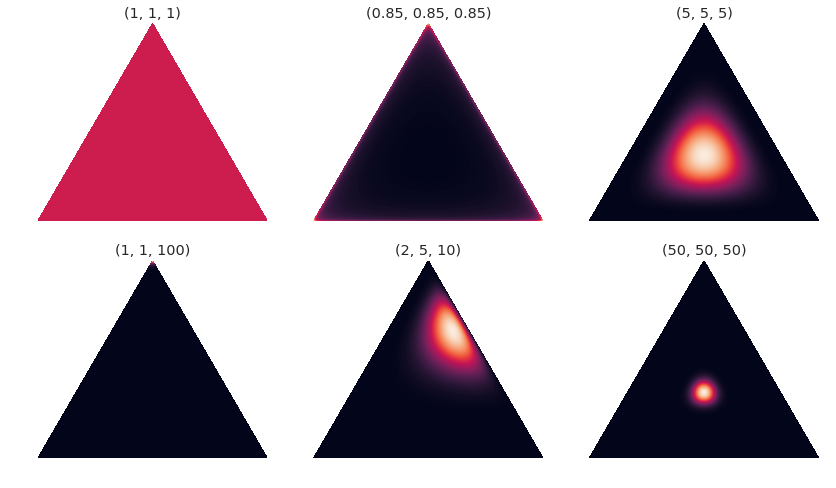

In [36]:
from Dir import *

plot_dirichlet = PlotDirichlet()

alphas = [(1, 1, 1), (0.85,0.85,0.85), (5,5,5), (1,1,100), (2, 5, 10), (50, 50, 50)]

f, axes = plt.subplots(2, 3, figsize=(14, 8))
for i, ax in enumerate(axes.flat):
    dist = Dirichlet(alphas[i])
    ax = plot_dirichlet.draw_pdf_contours(ax, dist, alphas[i])